# ==============================================================================
# FLUXO COMPLETO: PREPARAÇÃO E VALIDAÇÃO DE DADOS
# Machine Learning - FCUP
# ==============================================================================

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ferramentas do Scikit-Learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier # Modelo simples para testar

In [2]:
# Configuração visual
sns.set_theme(style="whitegrid")

In [3]:
# ------------------------------------------------------------------------------
# 1. CARREGAMENTO DOS DADOS
# ------------------------------------------------------------------------------
print("--- 1. Carregando Dataset Titanic ---")
df = pd.read_csv("Titanic-Dataset.csv")

# Para simplificar o exercício, vamos selecionar apenas colunas numéricas relevantes
# e a variável alvo 'survived'.
colunas_interesse = ['Survived', 'Pclass', 'Age', 'Fare']
df = df[colunas_interesse]

display(df.head())

--- 1. Carregando Dataset Titanic ---


,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [4]:
# ------------------------------------------------------------------------------
# 2. ANÁLISE BÁSICA (DIAGNÓSTICO)
# ------------------------------------------------------------------------------
print("\n--- 2. Diagnóstico: Dados em Falta e Escalas ---")

# A. Verificando dados em falta
print("Contagem de nulos por coluna:")
print(df.isnull().sum())
print("-" * 30)


--- 2. Diagnóstico: Dados em Falta e Escalas ---
Contagem de nulos por coluna:
Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64
------------------------------


Estatísticas Descritivas:


,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Text(0, 0.5, 'Valor')

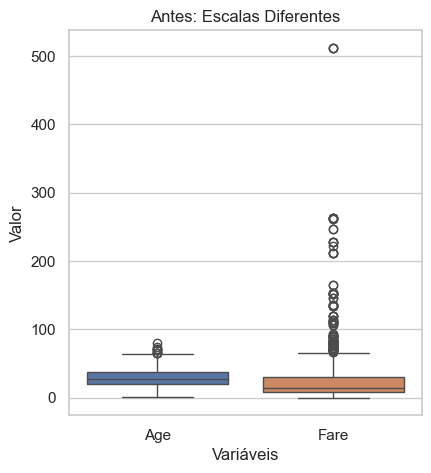

In [5]:
# B. Verificando Problemas de Escala
# Vamos comparar 'age' (Idade) e 'fare' (Tarifa)
print("Estatísticas Descritivas:")
display(df[['Age', 'Fare']].describe())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Antes: Escalas Diferentes")
plt.xlabel("Variáveis")
plt.ylabel("Valor")

In [6]:
# ------------------------------------------------------------------------------
# 3. TRATAMENTO: IMPUTAÇÃO (Preencher Nulos)
# ------------------------------------------------------------------------------
print("\n--- 3. Aplicação de Imputação ---")

# Estratégia: Como 'age' pode ter outliers, vamos usar a MEDIANA em vez da Média.
imputer = SimpleImputer(strategy='median')

# Nota: O fit_transform retorna um array numpy, precisamos converter de volta para DataFrame
# Aplicamos apenas na coluna 'age' que tinha falhas
df['Age'] = imputer.fit_transform(df[['Age']])

print("Nulos após imputação:")
print(df.isnull().sum())


--- 3. Aplicação de Imputação ---
Nulos após imputação:
Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64



--- 4. Aplicação de Normalização (Padronização) ---
Estatísticas Descritivas:


,Age,Fare
count,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18
std,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01
25%,-5.657365e-01,-4.891482e-01
50%,-1.046374e-01,-3.573909e-01
75%,4.333115e-01,-2.424635e-02
max,3.891554e+00,9.667167e+00


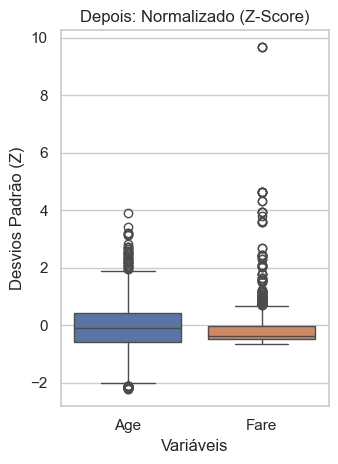

In [8]:
# ------------------------------------------------------------------------------
# 4. TRATAMENTO: NORMALIZAÇÃO (Ajustar Escalas)
# ------------------------------------------------------------------------------
print("\n--- 4. Aplicação de Normalização (Padronização) ---")

# Vamos usar Z-Score (StandardScaler) para colocar Idade e Tarifa na mesma régua.
scaler = StandardScaler()

# Salvamos uma cópia para não perder os dados originais se precisarmos
df_scaled = df.copy()

# Normalizamos as colunas numéricas contínuas
colunas_para_normalizar = ['Age', 'Fare']
df_scaled[colunas_para_normalizar] = scaler.fit_transform(df[colunas_para_normalizar])

# Vamos comparar 'age' (Idade) e 'fare' (Tarifa)
print("Estatísticas Descritivas:")
display(df_scaled[['Age', 'Fare']].describe())

# Visualizando o resultado da normalização
plt.subplot(1, 2, 2)
sns.boxplot(data=df_scaled[colunas_para_normalizar])
plt.title("Depois: Normalizado (Z-Score)")
plt.xlabel("Variáveis")
plt.ylabel("Desvios Padrão (Z)")

plt.tight_layout()
plt.show()

In [9]:
# ------------------------------------------------------------------------------
# 5. DIVISÃO EM TREINO E TESTE (Holdout)
# ------------------------------------------------------------------------------
print("\n--- 5. Divisão Treino/Teste ---")

# Separar Atributos (X) do Alvo (y)
X = df_scaled.drop('Survived', axis=1) # Tudo menos 'survived'
y = df_scaled['Survived']              # Apenas 'survived'

# Divisão 70% Treino, 30% Teste
# stratify=y garante que a proporção de sobreviventes seja igual nos dois grupos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Tamanho do Treino: {X_train.shape}")
print(f"Tamanho do Teste:  {X_test.shape}")


--- 5. Divisão Treino/Teste ---
Tamanho do Treino: (623, 3)
Tamanho do Teste:  (268, 3)


In [10]:
# ------------------------------------------------------------------------------
# 6. VALIDAÇÃO CRUZADA (Cross-Validation)
# ------------------------------------------------------------------------------
print("\n--- 6. Validação Cruzada (k-Fold) ---")

# Vamos usar um modelo k-NN (Vizinhos Próximos)
# O k-NN depende MUITO da normalização que fizemos no passo 4.
modelo_knn = KNeighborsClassifier(n_neighbors=5)

# Aplicamos cross-validation com 5 pastas (folds) apenas nos dados de TREINO
scores = cross_val_score(modelo_knn, X_train, y_train, cv=5, scoring='accuracy')

print(f"Resultados das 5 iterações: {scores}")
print(f"Acurácia Média: {scores.mean():.2%}")
print(f"Desvio Padrão:  {scores.std():.2%}")

print("\n--- Conclusão ---")
print("O dataset foi limpo, normalizado e validado.")
print(f"Podemos esperar que este modelo acerte aprox. {scores.mean()*100:.1f}% das vezes em novos dados.")


--- 6. Validação Cruzada (k-Fold) ---
Resultados das 5 iterações: [0.712      0.656      0.712      0.68548387 0.62903226]
Acurácia Média: 67.89%
Desvio Padrão:  3.24%

--- Conclusão ---
O dataset foi limpo, normalizado e validado.
Podemos esperar que este modelo acerte aprox. 67.9% das vezes em novos dados.
